In [2]:
import pandas as pd
import matplotlib.pyplot 
l_up=[]
l_down=[]
l_year=[]
per_up=[]
per_down=[]
l_total=[]
for j in range(2003,2019):
    data = pd.read_csv(str(j)+".csv")
    l=[]
    for i in range(len(data.index)):
        if(data.loc[i,"Open"]>data.loc[i,"Close"]):
            v=-1
        else:
            v=1
        l.append(v)
    l_up.append(l.count(1))
    per_up.append((l.count(1)/len(l))*100) #Total=len(l)
    per_down.append((l.count(-1)/len(l))*100) #Total=len(l)
    l_total.append(len(l))
    l_down.append(l.count(-1))
    l_year.append(j)
df = pd.DataFrame(l_year,columns=["Year"])
df.insert(1,"Up",l_up, True)
df.insert(2,"%age(up)",per_up, True)
df.insert(3,"Down",l_down, True)
df.insert(4,"%age(down)",per_down, True)
df.insert(5,"Total",l_total, True)


df.loc[16] = ['Total', sum(l_up), sum(l_up)/sum(l_total)*100, sum(l_down),sum(l_down)/sum(l_total)*100,sum(l_total)]



In [3]:

df

,Year,Up,%age(up),Down,%age(down),Total
0,2003,152,59.842520,102,40.157480,254
1,2004,138,54.545455,115,45.454545,253
2,2005,141,56.175299,110,43.824701,251
3,2006,150,60.000000,100,40.000000,250
4,2007,137,55.020080,112,44.979920,249
5,2008,115,46.938776,130,53.061224,245
6,2009,131,53.909465,112,46.090535,243
7,2010,131,51.984127,121,48.015873,252
8,2011,105,42.510121,142,57.489879,247
9,2012,120,48.000000,130,52.000000,250


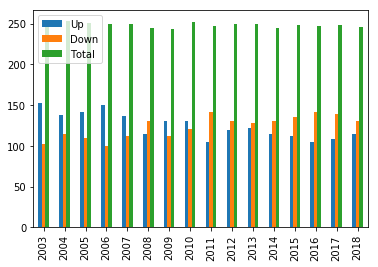

In [4]:
data=pd.DataFrame({'Up':l_up,'Down':l_down,'Total':l_total},index=l_year)
data.plot.bar()

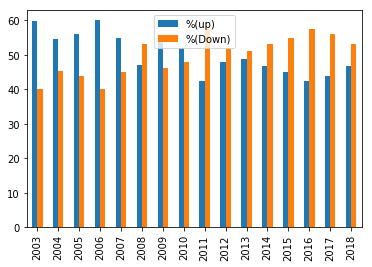

In [5]:
data=pd.DataFrame({'%(up)':per_up,'%(Down)':per_down},index=l_year)
data.plot.bar()

In [6]:
def simple_avg(l):
    count=0
    i=0
    s=[0]*(len(l)//10)
    for j in range(len(l)-len(l)%10):
        count=count+1
        s[i]=s[i]+l[j]
        if(count%10==0):
            i=i+1
    for j in range(len(s)):
        s[j]=s[j]/10
    #print(len(l)-len(l)%10)
    print(max(s))

for j in range(2003,2019):
    o=[]
    c=[]
    h=[]
    l=[]
    data = pd.read_csv(str(j)+".csv")
    for i in range(len(data.index)):
        '''if(data.loc[i,"Open"]>data.loc[i,"Close"]):
            v=-1
        else:
            v=1'''
        c.append(data.loc[i,"Close"])
        o.append(data.loc[i,"Open"])
        h.append(data.loc[i,"High"])
        l.append(data.loc[i,"Low"])
    print(j)
    simple_avg(c)

2003
1750.0549999999998
2004
2035.81
2005
2811.3450000000003
2006
3925.16
2007
5991.53
2008
6217.94
2009
5092.16
2010
6211.17
2011
5912.325
2012
5892.6050000000005
2013
6253.780000000001
2014
8493.8
2015
8830.775
2016
8789.175
2017
10363.745
2018
11619.91


In [7]:
def weighted_avg(l):
    count=0
    i=0
    s=[0]*(len(l)//10)
    for j in range(len(l)-len(l)%10):
        count=count+1
        s[i]=s[i]+(l[j])*(j%10+1)
        if(count%10==0):
            i=i+1
    for j in range(len(s)):
        s[j]=s[j]/55
    print(len(l)-len(l)%10)
    print(max(s))
    
for j in range(2003,2019):
    c=[]
    data = pd.read_csv(str(j)+".csv")
    for i in range(len(data.index)):
        '''if(data.loc[i,"Open"]>data.loc[i,"Close"]):
            v=-1
        else:
            v=1'''
        c.append(data.loc[i,"Close"])
    print(j)
    weighted_avg(c)

2003
250
1768.83
2004
250
2043.878181818182
2005
250
2806.0227272727275
2006
250
3938.66
2007
240
6032.92090909091
2008
240
6223.401818181819
2009
240
5112.41909090909
2010
250
6201.004545454545
2011
240
5865.273636363636
2012
250
5891.82
2013
250
6278.6509090909085
2014
240
8461.977272727272
2015
240
8819.228181818182
2016
240
8838.437272727273
2017
240
10400.29909090909
2018
240
11602.210909090909


In [8]:
def momentum(l):
    count=0
    i=0
    k=0
    s=[0]*(len(l)//10)
    for j in range(len(l)-len(l)%10):
        count=count+1
        if(count%10==0):
            k=k+1
        elif((count-1)%10==0):
            k=k+1
        if(k%2==0):
            s[i]=s[i]+(l[j]-l[j-9])
        if(count%10==0):
            i=i+1
    print(len(l)-len(l)%10)
    print(max(s))
    
for j in range(2003,2019):
    c=[]
    data = pd.read_csv(str(j)+".csv")
    for i in range(len(data.index)):
        '''if(data.loc[i,"Open"]>data.loc[i,"Close"]):
            v=-1
        else:
            v=1'''
        c.append(data.loc[i,"Close"])
    print(j)
    momentum(c)

2003
250
118.5
2004
250
128.29999999999995
2005
250
201.0
2006
250
310.39999999999964
2007
240
748.3999999999996
2008
240
362.4499999999998
2009
240
590.1999999999998
2010
250
403.5
2011
240
356.15000000000055
2012
250
338.6999999999998
2013
250
451.34999999999945
2014
240
412.35000000000036
2015
240
458.2000000000007
2016
240
551.6999999999998
2017
240
294.7999999999993
2018
240
388.85000000000036


In [9]:
def stochastic_k(l):
    max1=0
    min1=0
    count=0
    i=0
    k=0
    s=[0]*(len(l)//10)
    for j in range(len(l)-len(l)%10):
        count=count+1
        if(count%10==0):
            k=k+1
        elif((count-1)%10==0):
            k=k+1
            min1=l[j]
            max1=l[j]
        if(l[j]>max1):
            max1=l[j]
        elif(l[j]<min1):
            min1=l[j]
        if(k%2==0):
            s[i]=s[i]+((l[j]-min1)*100/(max1-min1))
        if(count%10==0):
            i=i+1
    print(len(l)-len(l)%10)
    print(s)
stochastic_k(l)

240
[92.65767934520946, 100.0, 27.60031678986276, 100.0, 60.859375, 36.77402992645184, 100.0, 100.0, 100.0, 61.2623762376237, 100.0, 36.6560622127953, 100.0, 100.0, 100.0, 100.0, 0.0, 0.0, 0.0, 0.0, 100.0, 49.06344410876177, 27.6996625421822, 91.92964739543874]


In [10]:
def stock_k(l):
    s=[0]*(len(l)-10)
    for j in range(10,len(l)):
        a=l[j-9:j+1]
        s[j-10]=s[j-10]+((l[j]-min(a))*100/(max(a)-min(a)))
    print(max(s))

for j in range(2003,2004):
    c=[]
    o=[]
    h=[]
    l=[]
    data = pd.read_csv(str(j)+".csv")
    for i in range(len(data.index)):
        '''if(data.loc[i,"Open"]>data.loc[i,"Close"]):
            v=-1
        else:
            v=1'''
        c.append(data.loc[i,"Close"])
        o.append(data.loc[i,"Open"])
        h.append(data.loc[i,"High"])
        l.append(data.loc[i,"Low"])
    print(j)
    stock_k(c)

2003
100.00000000000001


In [49]:
def stock_d(l):
    q=[]
    s=[0]*(len(l)-10)
    for j in range(10,len(l)):
        a=l[j-9:j+1]
        s[j-10]=s[j-10]+((l[j]-min(a))*100/(max(a)-min(a)))
    print(max(s))
    print(s)
    Q=[0]*3
    for j in range(len(s)-len(s)%3):
        Q[j%3]=Q[j%3]+s[j]
        if((j+1)%3==0):
            #Q[j%3]=sum(Q)/3
            q.append(sum(Q)/3)
            Q=[0]*3
    print(max(q))
    print(q)

for j in range(2018,2019):
    c=[]
    o=[]
    h=[]
    l=[]
    data = pd.read_csv(str(j)+".csv")
    for i in range(len(data.index)):
        '''if(data.loc[i,"Open"]>data.loc[i,"Close"]):
            v=-1
        else:
            v=1'''
        c.append(data.loc[i,"Close"])
        o.append(data.loc[i,"Open"])
        h.append(data.loc[i,"High"])
        l.append(data.loc[i,"Low"])
    print(j)
    stock_d(c)

2018
100.0
[100.0, 86.22423328305723, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 95.96046942557125, 100.0, 81.21874636585645, 69.95758373555688, 63.784301212507934, 0.0, 0.0, 0.0, 0.0, 15.32048340217222, 0.0, 14.259290398520166, 8.022697512003301, 16.113533232493896, 0.0, 0.0, 0.0, 17.117117117117562, 10.302610302610772, 70.58346839546158, 100.0, 87.26372637263681, 59.60846084608474, 44.08190819081926, 0.0, 0.0, 0.0, 20.646591970121143, 16.95845004668527, 62.37161531279158, 68.14546363409164, 75.80097445740415, 67.7132993588687, 15.019255455712072, 0.0, 9.049909801563539, 18.340348767288013, 6.163559831629579, 0.0, 30.923507462686572, 45.07690444471363, 31.938690969345853, 100.0, 100.0, 52.78396436525612, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 89.93513755312016, 100.0, 99.32777628394729, 100.0, 100.0, 71.86897880539442, 100.0, 100.0, 100.0, 90.00703729767716, 65.94409583571, 30.91842555618961, 85.8708530805686, 87.23341232227432, 100.0, 79.70137207425249, 100.0, 

In [53]:
def rsi(c):#c=closing o=opening
    rsi1=[]
    #for j in range(195,196):
    for j in range(14,(len(c)-len(c)%10)):
        k1=0
        k2=0
        up=[]
        dw=[]
        for i in range(14):
            if(c[j-i]>c[j-i-1]):
                up.append(c[j-i]-c[j-i-1])
                kl=k1+1
            else:
                dw.append(c[j-i-1]-c[j-i])
                k2=k2+1
        if(k1==0):
            k1=1
        elif(k2==0):
            k2=1
        rsi1.append(100-(100/(1+(sum(up)*k2/(sum(dw)*k1)))))
    print(min(rsi1))
rsi(c)

62.60271925892704


In [4]:
a=pd.DataFrame(l)
a


,0
0,-1
1,-1
2,-1
3,1
4,1
5,1
6,-1
7,-1
8,1
9,-1


In [10]:
len(l)

246

In [11]:
l.count(1)

115

In [4]:
import pandas as pd
l_up=[]
l_down=[]
l_year=[]
for j in range(2003,2019):
    data = pd.read_csv(str(j)+".csv")
    l=[]
    for i in range(len(data.index)):
        if(data.loc[i,"Open"]>data.loc[i,"Close"]):
            v=-1
        else:
            v=1
        l.append(v)
    l_up.append(l.count(1))
    l_down.append(l.count(-1))
    l_year.append(j)
df = pd.DataFrame(l_year,columns=["Year"])
df.insert(1,"Up",l_up, True)
df.insert(2,"Down",l_down, True)

In [5]:
5/10

0.5

In [6]:
5//10

0

In [6]:
11%12

11

In [20]:
k2=[1,2,3,4,5,6]

In [22]:
k2[1:3]

[2, 3]

In [25]:
0%2

0

In [35]:
1%3

1

In [44]:
2/3

0.6666666666666666

In [54]:
data = pd.read_csv("2018.csv")
c=[]
o=[]
h=[]
l=[]
s=[]
for i in range(len(data.index)):
    c.append(data.loc[i,"Close"])
    o.append(data.loc[i,"Open"])
    h.append(data.loc[i,"High"])
    l.append(data.loc[i,"Low"])
for i in range(1,14):
    s.append(c[i]-c[i-1])
s

[6.650000000001455,
 1.0,
 61.599999999998545,
 54.05000000000109,
 64.75,
 13.399999999999636,
 -4.799999999999272,
 19.0,
 30.049999999999272,
 60.29999999999927,
 -41.099999999998545,
 88.09999999999854,
 28.450000000000728]